<h4>Introduction</h4><br>
The team worked on an unsupervised learning problem set up on a Mobile App survey. This last presents different questions, for example, related to the frequency of app usage, the types of app download, and demographic information. Given the fact that there is a myriad of apps, the aim of this project is to find a marketing strategy to properly target consumers based on their app download behavior. This is achieved by conducting an analysis of the information derived from the survey through unsupervised machine learning algorithms and techniques.


In [1]:
########################################
# importing packages
########################################
import numpy             as np # mathematical essentials
import pandas            as pd # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn           as sns # enhanced visualizations

# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler # standard scaler
from sklearn.decomposition   import PCA # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering

########################################
# read excel
########################################
survey_org = pd.read_excel(io = './Mobile_App_Survey_Data.xlsx')

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

<h4>Data Selection</h4><br>
<h5>The data that is included in the principle component analysis:</h5><br> 
Q13 Using frequency of apps<br>
Q24 The attitude to technology<br>
Q25 Self positioning<br>
Q26 Description of purchasing behavior<br>
Question 4 and 11 were covered by question 13 that was asked for both different kinds of apps and the usage feeling for each one. In order to avoid having multiple variables that explain the same thing, we chose not to consider them in our model and stick with one question (q13).<br>

<h5>Demographic Information:</h5><br>
Q1 Age group<br>
Q2 Download channel<br>
Q48 Highest level of education<br>
Q49 Marital status<br>
Q54 Race<br>
Q55 Hispanic or Latino<br>
Q56 Household annual income<br>
Q57 Gender<br>
We chose not to implement the question regarding the number of children (q50) since most of the survey takers possess mobiles running under Android and IOS. Considering a phone is a personal tool and does not often land in a child's hands. Most of them use tablets or other devices. Since it is highly unlikely that a child is in possession of its parents' phone, we did not consider the question regarding the number of children. We believe it would have explained too little in the behavior of the survey takers.

In [3]:
########################################
# PCA Datasets Allocation
########################################

survey_13_app_freq  = survey_org.loc[ : , ['q13r1','q13r2','q13r3','q13r4','q13r5','q13r6','q13r7', 
                                           'q13r8', 'q13r9','q13r10', 'q13r11', 'q13r12'] ] 

survey_24_tech      = survey_org.loc[ : , ['q24r1', 'q24r2', 'q24r3', 'q24r4','q24r5', 'q24r6', 
                                           'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11','q24r12'] ] 

survey_25_self_posi = survey_org.loc[ : , ['q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7',
                                           'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12'] ] 

survey_26_cus_beh   = survey_org.loc[ : , ['q26r18', 'q26r3','q26r4', 'q26r5', 'q26r6', 'q26r7', 
                                           'q26r8', 'q26r9', 'q26r10','q26r11', 'q26r12', 'q26r13', 
                                           'q26r14', 'q26r15', 'q26r16', 'q26r17'] ] 


<h4>Principle Components Explanation </h4><br>
The number shown in the loading DataFrame means the level survey takers' attitude to the survey question. The bigger the absolute number is, the stronger the feeling is. A positive number means the survey takers disagree with the choice (r1-r12). A negative number means the survey takers agree with the choice (r1-r12).

In [4]:
########################################
# Question 13 - App using frequency - PCA Application
########################################
# applying the unsupervised_scaler function to scale the data
customer_13_app_freq = unsupervised_scaler(df = survey_13_app_freq)

# INSTANTIATING a PCA object with no limit to principal components
pca_13_app_freq = PCA(n_components = 2,
                   random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca_13_app_freq = pca_13_app_freq.fit_transform(customer_13_app_freq)

# transposing pca components
factor_loadings_13_app_freq = pd.DataFrame(np.transpose(pca_13_app_freq.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_13_app_freq = factor_loadings_13_app_freq.set_index(survey_13_app_freq.columns)

#rename the columns for principle components
factor_loadings_13_app_freq.columns = ['Screen addicts','Outsiders']

# checking the result
factor_loadings_13_app_freq

,Screen addicts,Outsiders
q13r1,-0.11,0.47
q13r2,-0.30,-0.00
q13r3,-0.35,-0.29
q13r4,-0.22,0.34
q13r5,-0.34,-0.03
q13r6,-0.21,0.42
q13r7,-0.36,-0.29
q13r8,-0.37,-0.10
q13r9,-0.30,-0.26
q13r10,-0.26,0.26


<strong>Screen addicts:</strong> Most people under this component frequently use all types of apps, which potentially means that they are spending most of their time on their phones. We can understand this from a similar number of the factors loadings.<br>
<strong>Outsiders:</strong> People under this component do not use the common apps very often, such as Facebook, YouTube, Netflix. They just put time into the apps that they choose by themselves.


In [5]:
########################################
# Question 24 - Attitude to technology - PCA Application
########################################

# applying the unsupervised_scaler function
customer_24_tech = unsupervised_scaler(df = survey_24_tech)

# INSTANTIATING a PCA object with no limit to principal components
pca_24_tech = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca_24_tech = pca_24_tech.fit_transform(customer_24_tech)

# transposing pca components
factor_loadings_24_tech = pd.DataFrame(np.transpose(pca_24_tech.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_24_tech = factor_loadings_24_tech.set_index(survey_24_tech.columns)

#rename the columns for principle components
factor_loadings_24_tech.columns = ['No value in technology','Digital natives','Basic tech user']

# checking the result
factor_loadings_24_tech

,No value in technology,Digital natives,Basic tech user
q24r1,0.11,0.46,0.10
q24r2,0.32,-0.05,0.44
q24r3,0.27,0.04,0.64
q24r4,-0.02,0.59,-0.15
q24r5,0.24,0.22,0.19
q24r6,0.30,0.02,0.09
q24r7,0.36,0.02,-0.08
q24r8,0.36,-0.09,-0.09
q24r9,-0.06,0.61,-0.05
q24r10,0.37,-0.03,-0.26


<strong>No value in technology:</strong> They do not agree on what the internet is most commonly used for. In fact, the highest positive factors loadings are represented by the interest in music, the possibility of being in touch with family and friends also through social media. <br>
<strong>Digital Natives: </strong>In the ninth answer, the high positive value means that they do not think there is too much information on the internet, and similarly, the fourth answer value is telling us they do not think there is too much information. So for these people, it is not hard to keep up with the evolution of technology (r1) and the multiple contents around it, so most probably they are people born together with technology (Generation Z).<br>
<strong>Basic Tech Users:</strong>Represents the people that use their devices for common operations like calls, listening to music, socials. But they are not sophisticated enough to buy extra gadgets or be specialists in technology (r2, r3).


In [6]:
########################################
# Question 25 - Self-positioning - PCA Application
########################################

# applying the unsupervised_scaler function
customer_25_self_posi = unsupervised_scaler(df = survey_25_self_posi)

# INSTANTIATING a PCA object with no limit to principal components
pca_25_self_posi = PCA(n_components = 3,
                       random_state = 219)

# FITTING and TRANSFORMING the scaled data
customer_pca_25_self_posi = pca_25_self_posi.fit_transform(customer_25_self_posi)

# transposing pca components
factor_loadings_25_self_posi = pd.DataFrame(np.transpose(pca_25_self_posi.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_25_self_posi = factor_loadings_25_self_posi.set_index(customer_25_self_posi.columns)

#rename the columns for principle components
factor_loadings_25_self_posi.columns = ['Insecure','Follow influencer','Leader']

# checking the result
factor_loadings_25_self_posi

,Insecure,Follow influencer,Leader
q25r1,0.34,0.07,-0.03
q25r2,0.34,-0.06,0.07
q25r3,0.31,0.08,0.09
q25r4,0.33,0.15,-0.31
q25r5,0.32,-0.04,0.21
q25r6,0.04,-0.76,0.32
q25r7,0.28,0.12,-0.49
q25r8,0.31,-0.14,0.12
q25r9,0.29,0.06,0.33
q25r10,0.27,0.21,0.30


<strong>Insecure:</strong> Not confident in taking risks, also due to the time pressure and not feeling able to take responsibilities or control. This is shown basically by all the positive numbers around 0.3 (disagree), the lowest that stand out are in r6 and r12, that in fact are about responsibilities and time pressure. <br>
<strong>Follow influencer: </strong>People are in need of guidelines and time. A high negative number in response to question 6, leads us to think that someone that "would rather be told what to do" is easy to persuade.<br>
<strong>Leader:</strong>People that have control and responsibilities over the situation and feeling the time pressure. The 3 high negative numbers are confirming that these type of people like to be in control (r7) and like to take the lead in decision (r4) but understandably feel the time constraint (r12).

In [7]:
########################################
# Question 26 - Self-positioning - PCA Application
########################################

# applying the unsupervised_scaler function
customer_26_cus_beh = unsupervised_scaler(df = survey_26_cus_beh)

# INSTANTIATING a PCA object with no limit to principal components
pca_26_cus_beh = PCA(n_components = 2,
                     random_state = 219)

# FITTING and TRANSFORMING the scaled data
customer_pca_26_cus_beh = pca_26_cus_beh.fit_transform(customer_26_cus_beh)

# transposing pca components
factor_loadings_26_cus_beh = pd.DataFrame(np.transpose(pca_26_cus_beh.components_.round(decimals = 2)))

# naming rows as original features
factor_loadings_26_cus_beh = factor_loadings_26_cus_beh.set_index(survey_26_cus_beh.columns)

#rename the columns for principle components
factor_loadings_26_cus_beh.columns = ['Hard to influence','Compulsive buyer']

# checking the result
factor_loadings_26_cus_beh

,Hard to influence,Compulsive buyer
q26r18,0.29,-0.12
q26r3,0.14,0.60
q26r4,0.28,-0.02
q26r5,0.25,0.16
q26r6,0.25,-0.07
q26r7,0.29,-0.15
q26r8,0.28,0.04
q26r9,0.22,0.28
q26r10,0.28,0.14
q26r11,0.18,-0.34


<strong>Hard to influence:</strong> They do not care about the brands and the trends. This is derived by the 0.29 (disagree) in all the questions related to the interest in brands. <br>
<strong>Compulsive buyer: </strong> In order to enjoy the money they earn, they have to spend them (r13) sometimes even by making impulsive purchases (r16) of high-rated brands (r6, r18).

In [8]:
########################################
# PCA checking for each datasets
########################################
# INSTANTIATING a PCA object with no limit to principal components
pca_13 = PCA(n_components = None,
             random_state = 219)

# FITTING and TRANSFORMING the scaled data
customer_pca_13 = pca_13.fit_transform(customer_13_app_freq)
  
# printing the sum of all explained variance ratios
print('the sum of all explained variance ratios for question 13:')
print(pca_13.explained_variance_ratio_.sum().round(2))

# INSTANTIATING a PCA object with no limit to principal components
pca_24 = PCA(n_components = None,
             random_state = 219)

# FITTING and TRANSFORMING the scaled data
customer_pca_24 = pca_24.fit_transform(customer_24_tech)
  
# printing the sum of all explained variance ratios
print('the sum of all explained variance ratios for question 24:')
print(pca_24.explained_variance_ratio_.sum().round(2))

# INSTANTIATING a PCA object with no limit to principal components
pca_25 = PCA(n_components = None,
             random_state = 219)

# FITTING and TRANSFORMING the scaled data
customer_pca_25 = pca_25.fit_transform(customer_25_self_posi)
  
# printing the sum of all explained variance ratios
print('the sum of all explained variance ratios for question 25:')
print(pca_25.explained_variance_ratio_.sum().round(2))

# INSTANTIATING a PCA object with no limit to principal components
pca_26 = PCA(n_components = None,
             random_state = 219)

# FITTING and TRANSFORMING the scaled data
customer_pca_26 = pca_26.fit_transform(customer_26_cus_beh)
  
# printing the sum of all explained variance ratios
print('the sum of all explained variance ratios for question 26:')
print(pca_26.explained_variance_ratio_.sum().round(2))


the sum of all explained variance ratios for question 13:
1.0
the sum of all explained variance ratios for question 24:
1.0
the sum of all explained variance ratios for question 25:
1.0
the sum of all explained variance ratios for question 26:
1.0


<h4>Audience affected by loadings</h4><br>
Basically, all the components show strong impacts on our customers no matter positive or negative. The percentage shown in the following output means the people that are influenced by the components positively. For instance, 27% of survey takers are shown a strong positive trend on "Screen addicts".

In [50]:
########################################
# Tranform PCA Result - Q13 
########################################
# analyzing factor strengths per customer
factor_loadings_appfreq13 = pca_13_app_freq.transform(customer_13_app_freq)

# converting to a DataFrame
factor_loadings_df_appfreq13 = pd.DataFrame(factor_loadings_appfreq13)

# renaming columns
factor_loadings_df_appfreq13.columns = factor_loadings_13_app_freq.columns

# checking the results      
print(f"""
The percentage of siginificant "Screen addicts" customers:
{round(len(factor_loadings_df_appfreq13['Screen addicts'][factor_loadings_df_appfreq13['Screen addicts'] > 1.0])/
len(factor_loadings_df_appfreq13),2)}

The percentage of siginificant "Outsiders" customers:
{round(len(factor_loadings_df_appfreq13['Outsiders'][factor_loadings_df_appfreq13['Outsiders'] > 1.0])/
len(factor_loadings_df_appfreq13),2)}
""")


The percentage of siginificant "Screen addicts" customers:
0.27

The percentage of siginificant "Outsiders" customers:
0.18



In [52]:
########################################
# Tranform PCA Result - Q24 
########################################
# analyzing factor strengths per customer
factor_loadings_tech24 = pca_24_tech.transform(customer_24_tech)

# converting to a DataFrame
factor_loadings_df_tech24 = pd.DataFrame(factor_loadings_tech24)

# renaming columns
factor_loadings_df_tech24.columns = factor_loadings_24_tech.columns

# checking the results      
print(f"""
The percentage of siginificant "No value in technology" customers:
{round(len(factor_loadings_df_tech24['No value in technology'][factor_loadings_df_tech24['No value in technology'] > 1.0])/
len(factor_loadings_df_tech24),2)}

The percentage of siginificant "Digital natives" customers:
{round(len(factor_loadings_df_tech24['Digital natives'][factor_loadings_df_tech24['Digital natives'] > 1.0])/
len(factor_loadings_df_tech24),2)}

The percentage of siginificant "Basic tech user" customers:
{round(len(factor_loadings_df_tech24['Basic tech user'][factor_loadings_df_tech24['Basic tech user'] > 1.0])/
len(factor_loadings_df_tech24),2)}
""")


The percentage of siginificant "No value in technology" customers:
0.29

The percentage of siginificant "Digital natives" customers:
0.26

The percentage of siginificant "Basic tech user" customers:
0.13



In [53]:
########################################
# Tranform PCA Result - Q25
########################################
# analyzing factor strengths per customer
factor_loadings_selfposi25 = pca_25_self_posi.transform(customer_25_self_posi)

# converting to a DataFrame
factor_loadings_df_selfposi25 = pd.DataFrame(factor_loadings_selfposi25)

# renaming columns
factor_loadings_df_selfposi25.columns = factor_loadings_25_self_posi.columns

# checking the results      
print(f"""
The percentage of siginificant "Insecure" customers:
{round(len(factor_loadings_df_selfposi25['Insecure'][factor_loadings_df_selfposi25['Insecure'] > 1.0])/
len(factor_loadings_df_selfposi25),2)}

The percentage of siginificant "Follow influencer" customers:
{round(len(factor_loadings_df_selfposi25['Follow influencer'][factor_loadings_df_selfposi25['Follow influencer'] > 1.0])/
len(factor_loadings_df_selfposi25),2)}

The percentage of siginificant "Leader" customers:
{round(len(factor_loadings_df_selfposi25['Leader'][factor_loadings_df_selfposi25['Leader'] > 1.0])/
len(factor_loadings_df_selfposi25),2)}
""")


The percentage of siginificant "Insecure" customers:
0.32

The percentage of siginificant "Follow influencer" customers:
0.2

The percentage of siginificant "Leader" customers:
0.13



In [54]:
########################################
# Tranform PCA Result - Q26
########################################
# analyzing factor strengths per customer
factor_loadings_cusbeh26 = pca_26_cus_beh.transform(customer_26_cus_beh)

# converting to a DataFrame
factor_loadings_df_cusbeh26 = pd.DataFrame(factor_loadings_cusbeh26)

# renaming columns
factor_loadings_df_cusbeh26.columns = factor_loadings_26_cus_beh.columns

# checking the results      
print(f"""
The percentage of siginificant "Hard to influence" customers:
{round(len(factor_loadings_df_cusbeh26['Hard to influence'][factor_loadings_df_cusbeh26['Hard to influence'] > 1.0])/
len(factor_loadings_df_cusbeh26),2)}

The percentage of siginificant "Compulsive buyer" customers:
{round(len(factor_loadings_df_cusbeh26['Compulsive buyer'][factor_loadings_df_cusbeh26['Compulsive buyer'] > 1.0])/
len(factor_loadings_df_cusbeh26),2)}
""")


The percentage of siginificant "Hard to influence" customers:
0.36

The percentage of siginificant "Compulsive buyer" customers:
0.17



In [13]:
########################################
# Combined the all pca components
########################################
#combined all the pca analysis into one datasets
pca_concat = pd.concat([factor_loadings_df_appfreq13,
                        factor_loadings_df_tech24,
                        factor_loadings_df_selfposi25,
                        factor_loadings_df_cusbeh26],
                          axis = 1)

# applying the unsupervised_scaler function to scale the variance for the pca result.
#becuase variance amongst our features is no longer equal
pca_scaled = unsupervised_scaler(df = pca_concat)


In [15]:
########################################
# Clustering
########################################
#We use the following code to draw the process of clustering.

#standard_mergings_ward = linkage(y = pca_scaled,method = 'ward',optimal_ordering = True)
#fig, ax = plt.subplots(figsize=(12, 12))
#dendrogram(Z = standard_mergings_ward,leaf_rotation = 90,leaf_font_size = 6)
#plt.show()

# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

3    525
2    392
0    340
1    295
Name: Cluster, dtype: int64


<h4>Cluster Description</h4><br>
<strong>Cluster 1:</strong>
In this cluster people do not find strong value in technology, in fact do not spend a lot of time on screens. Even if they are hard to influence, they are prone to make impulsive purchases based on their needs.<br>

<strong>Cluster 2:</strong>
Here the people spend a lot of time on screens. They were not born with technology but able to adapt to it. These people are easy to influence because they tend to follow the trends.<br>

<strong>Cluster 3:</strong>
People from this cluster show some value in technology, are not easy to influence, and feel slightly insecure. Nevertheless, they are not categorized as outsiders or screen addicts. They do not make compulsive purchases and use technology further than the basics.<br>

<strong>Cluster 4:</strong>
People from this division do not have a strong value in technology and they do not make compulsive purchases because of their impermeability to being influenced. This group was born with technology but does not take full advantage of it by sticking to the basics.<br>

<strong>Each Cluster means one Customer Segmentation</strong>

In [83]:
########################################
# Draw Customer Segmentation
########################################
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Screen addicts', 'Outsiders', 'No value in technology',
       'Digital natives', 'Basic tech user', 'Insecure', 'Follow influencer',
       'Leader', 'Hard to influence', 'Compulsive buyer'] 

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Screen addicts,Outsiders,No value in technology,Digital natives,Basic tech user,Insecure,Follow influencer,Leader,Hard to influence,Compulsive buyer
0,-0.41,0.87,1.11,0.03,0.70,0.73,0.11,0.17,0.69,0.63
1,1.05,0.28,-0.54,-1.13,0.07,-0.83,1.05,-0.31,-1.19,0.43
2,-0.43,-0.38,0.33,-0.01,-0.81,0.66,0.00,0.03,0.57,-0.26
3,-0.01,-0.44,-0.67,0.62,0.11,-0.50,-0.66,0.04,-0.21,-0.46


In [17]:
sur_channel = survey_org.loc[:,['q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10']]

sur_channel['Iphone']=0
for index,val in sur_channel.iterrows():
    if sur_channel.loc[index,'q2r1'] == 1:
        sur_channel.loc[index,'Iphone'] = 1

sur_channel['Android']=0
for index,val in sur_channel.iterrows():
    if sur_channel.loc[index,'q2r3'] == 1:
        sur_channel.loc[index,'Android'] = 1
    elif sur_channel.loc[index,'q2r4'] == 1:
        sur_channel.loc[index,'Android'] = 1
    elif sur_channel.loc[index,'q2r5'] == 1:
        sur_channel.loc[index,'Android'] = 1
    elif sur_channel.loc[index,'q2r6'] == 1:
        sur_channel.loc[index,'Android'] = 1
    elif sur_channel.loc[index,'q2r9'] == 1:
        sur_channel.loc[index,'Android'] = 1

sur_channel['Other devices']=0
for index,val in sur_channel.iterrows():
    if sur_channel.loc[index,'q2r2'] == 1:
        sur_channel.loc[index,'Other devices'] = 1
    elif sur_channel.loc[index,'q2r7'] == 1:
        sur_channel.loc[index,'Other devices'] = 1
    elif sur_channel.loc[index,'q2r8'] == 1:
        sur_channel.loc[index,'Other devices'] = 1

sur_channel['Channel'] = 'Only Other devices'
for index,val in sur_channel.iterrows():
    if sur_channel.loc[index,'Iphone'] == 1 and sur_channel.loc[index,'Android'] == 0:
        sur_channel.loc[index,'Channel'] = 'Only Iphone'
    elif sur_channel.loc[index,'Iphone'] == 0 and sur_channel.loc[index,'Android'] == 1:
        sur_channel.loc[index,'Channel'] = 'Only Android'
    elif sur_channel.loc[index,'Iphone'] == 1 and sur_channel.loc[index,'Android'] == 1:
        sur_channel.loc[index,'Channel'] = 'Multiple Channels'
        


In [18]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                          pca_concat],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_org.loc[ : , ['q1', 'q48', 'q49','q54', 'q55','q56', 'q57']],
                                sur_channel.loc[:,'Channel'],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Age group',
                              'Education',
                              'Marital status',
                              'Race',
                              'Hispanic or Latino ethnicity',
                              'Household annual income',
                              'Gender',
                              'Channel',
                              'Cluster',
                              'Screen addicts', 'Outsiders', 'No value in technology',
                              'Digital natives', 'Basic tech user', 'Insecure', 'Follow influencer',
                              'Leader', 'Hard to influence', 'Compulsive buyer']


# renaming age group
Age_group_names = {1 : 'Under 18',
                   2 : '18-24',
                   3 : '25-29',
                   4 : '30-34',
                   5 : '35-39',
                   6 : '40-44',
                   7 : '45-49',
                   8 : '50-54',
                   9 : '55-59',
                   10: '60-64',
                   11: '65 or over'}


final_pca_clust_df['Age group'].replace(Age_group_names, inplace = True)


# renaming education
Education_names = {1 : 'Some high School',
                   2 : 'High school graduate',
                   3 : 'Some college',
                   4 : 'College graduate',
                   5 : 'Some post-graduate studies',
                   6 : 'Post graduate degree'}

final_pca_clust_df['Education'].replace(Education_names, inplace = True)



# renaming marital status
marital_status_names = {1 : 'Married',
                        2 : 'Single',
                        3 : 'Single with partner',
                        4 : 'Separated/Widowed/Divorced'}

final_pca_clust_df['Marital status'].replace(marital_status_names, inplace = True)



# renaming race
race_names = {1 : 'White or Caucasian',
              2 : 'Black or African American',
              3 : 'Asian',
              4 : 'Native Hawaiian or Other Pacific Islander',
              5 : 'American Indian or Alaska Native',
              6 : 'Other race'}

final_pca_clust_df['Race'].replace(race_names, inplace = True)


# renaming hispanic or latino ethnicity
ethnicity_names = {1 : 'Yes',
                   2 : 'No'}

final_pca_clust_df['Hispanic or Latino ethnicity'].replace(ethnicity_names, inplace = True)


# renaming household annual income  #1-5 low #6-9 medium #10-14 high for one 
income_names = {1 : 'Under $10,000',
                2 : '$10,000-$14,999',
                3 : '$15,000-$19,999',
                4 : '$20,000-$29,999',
                5 : '$30,000-$39,999',
                6 : '$40,000-$49,999',
                7 : '$50,000-$59,999',
                8 : '$60,000-$69,999',
                9 : '$70,000-$79,999',
                10: '$80,000-$89,999',
                11: '$90,000-$99,999',
                12: '$100,000-$124,999',
                13: '$125,000-$149,999',
                14: '$150,000 and over'}


final_pca_clust_df['Household annual income'].replace(income_names, inplace = True)

# renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

# renaming gender
gender_names = {1 : 'Male',
                2 : 'Female'}

final_pca_clust_df['Gender'].replace(gender_names, inplace = True)

final_pca_clust_df

,Age group,Education,Marital status,Race,Hispanic or Latino ethnicity,Household annual income,Gender,Channel,Cluster,Screen addicts,Outsiders,No value in technology,Digital natives,Basic tech user,Insecure,Follow influencer,Leader,Hard to influence,Compulsive buyer
0,60-64,Some college,Separated/Widowed/Divorced,Black or African American,No,"$30,000-$39,999",Male,Only Android,Cluster 1,-3.26,1.37,3.82,1.49,0.35,5.50,-0.67,-1.19,2.70,-0.35
1,35-39,Some post-graduate studies,Married,Asian,No,"$80,000-$89,999",Female,Only Android,Cluster 2,3.02,0.59,-2.00,-2.74,-0.02,-2.04,2.30,-0.28,-3.22,1.21
2,45-49,College graduate,Separated/Widowed/Divorced,Black or African American,No,"$40,000-$49,999",Male,Only Android,Cluster 3,-1.41,-0.12,2.98,-0.04,-0.83,3.88,-0.67,0.49,3.89,-0.34
3,45-49,High school graduate,Married,White or Caucasian,No,"$30,000-$39,999",Male,Only Iphone,Cluster 2,-2.22,0.77,-1.12,-1.90,-1.18,-1.47,1.65,0.47,-1.93,-0.30
4,18-24,Some post-graduate studies,Single,Asian,No,"$20,000-$29,999",Female,Only Iphone,Cluster 2,1.68,0.20,1.34,-0.99,0.89,0.03,1.70,-0.21,-1.21,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,18-24,High school graduate,Single,Other race,Yes,"Under $10,000",Male,Only Iphone,Cluster 4,0.65,-0.33,-0.74,-0.73,-0.41,-2.56,-1.09,1.20,-2.66,-1.42
1548,30-34,Some college,Married,White or Caucasian,No,"$70,000-$79,999",Female,Only Iphone,Cluster 4,-1.69,-0.94,-1.61,2.01,-0.33,-0.12,-0.54,-0.10,-2.93,1.10
1549,25-29,College graduate,Single,White or Caucasian,No,"$100,000-$124,999",Female,Multiple Channels,Cluster 2,4.47,0.76,-1.76,-1.92,0.21,-1.91,1.32,-0.56,-2.14,1.18
1550,18-24,High school graduate,Single,Other race,Yes,"$50,000-$59,999",Male,Multiple Channels,Cluster 4,-0.00,-2.14,-0.46,0.46,-0.27,-0.76,-0.32,-1.43,-2.12,-1.23


<h4>Information Analysis</h4>
<h5>Limitations of some analysis</h5><br>
In most cases, Marital status, Race (including Hispanic/Latino ethnicity), Gender, and Channel did not have any impact on the variance of the clusters. We decided not to include these variables in the boxplot graphs and analysis. On the other hand, Age group and Household annual income did have an impact.



<h5>Basic Tech user / Age group</h5><br>
People from cluster 1 that are under the age of 18 are more likely to use the basic features of technology. Cluster 2 & 4 display the same behavior and remain mainly neutral regarding the features no matter the age group. On the other hand, people from cluster 3 are probably using their technology beyond the basic features. In this same group, however, the older people (over 65) are neutral. 

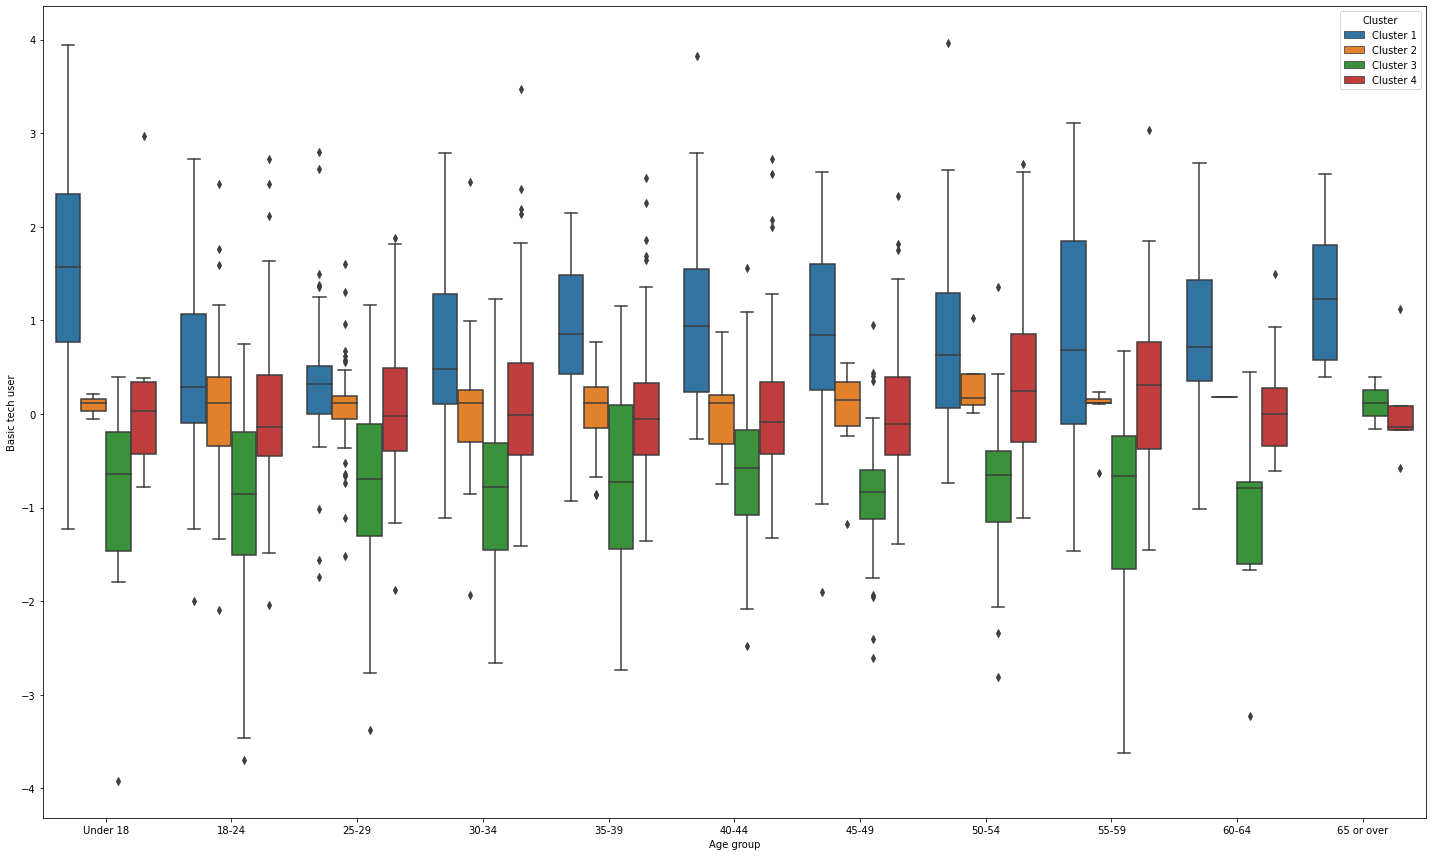

In [19]:
########################
# BoxPlot Analysis - Age 
########################

# draw box plot for Age group and Basic tech user
fig, ax = plt.subplots(figsize = (20, 12))
sns.boxplot(x = 'Age group',
            y = 'Basic tech user',
            hue = 'Cluster',
            data = final_pca_clust_df,
            order= [ 'Under 18', '18-24','25-29', '30-34', '35-39', '40-44', '45-49',
                     '50-54', '55-59', '60-64', '65 or over'])


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<h5>Follow influencers / Age group</h5><br>
People from cluster 2 are the most likely to be influenced in buying technology, followed by cluster 1, then 3, and finally 4. We can observe a decrease on the graph when the age increases for clusters 1, 3, and 4, concluding that the younger generations are most likely to be influenced to consume apps and follow the opinion from KOLs.

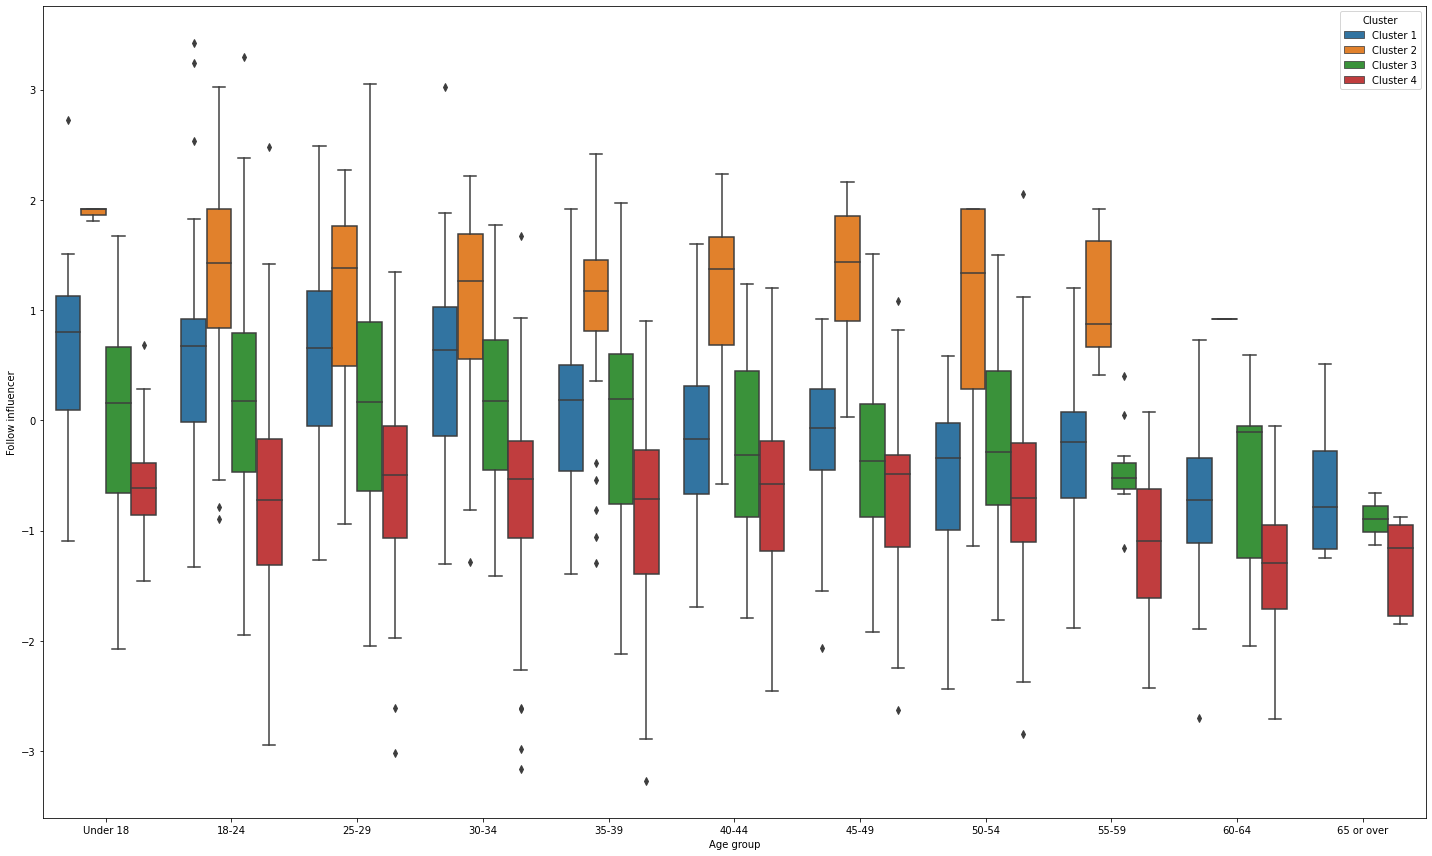

In [20]:
########################
# BoxPlot Analysis - Age 
########################

# draw box plot for Age group and Follow influencer
fig, ax = plt.subplots(figsize = (20, 12))
sns.boxplot(x = 'Age group',
            y = 'Follow influencer',
            hue = 'Cluster',
            data = final_pca_clust_df,
            order= [ 'Under 18', '18-24','25-29', '30-34', '35-39', '40-44', '45-49',
                     '50-54', '55-59', '60-64', '65 or over'])


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<h5>Compulsive buyer / Education</h5><br>
People from clusters 1, 2, and 3 tend to do less compulsive purchases the more they are educated. People from cluster 2 shows the opposite behavior by increasing their number of compulsive purchases behavior with more education. The separation on the last group of education shows that people with more balanced behavior and high education are less likely to make compulsive purchases than people from the same educational background but more absolute behaviors. 


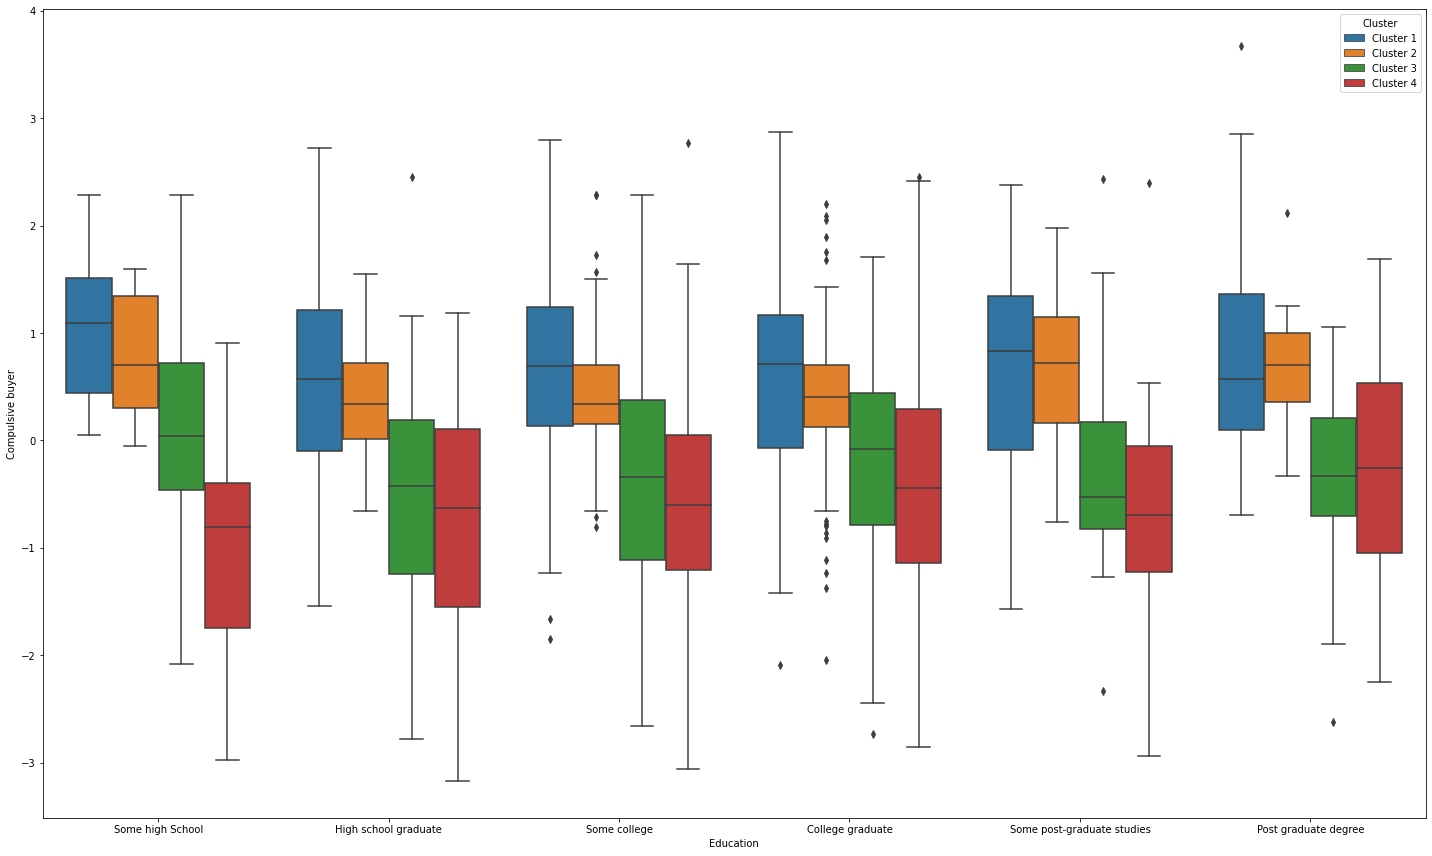

In [21]:
########################
# BoxPlot Analysis - Education
########################

# draw box plot for Education and Compulsive buyer
fig, ax = plt.subplots(figsize = (20, 12))
sns.boxplot(x = 'Education',
            y = 'Compulsive buyer',
            hue = 'Cluster',
            data = final_pca_clust_df,
            order= [ 'Some high School','High school graduate','Some college',
                     'College graduate','Some post-graduate studies','Post graduate degree'])


# formatting and displaying the plot
plt.tight_layout()
plt.show()

<h5>Compulsive buyer / household annual income</h5><br>
The different Household annual income boxplots showed no particular impact of the variable on the clusters. Considering the average price of paying apps, we understand that it will make no difference from one income range to another.

<h5>Other Findings</h5><br>
<strong>Finding 1</strong><br>
69% of the survey takers have more than 50% of their apps are free to download. We chose not to include this variable as discussing whether to monetize the app through the user would have already been answered. 

In [23]:
print(survey_org['q12'].value_counts(normalize = True).round(2))

5    0.24
4    0.24
6    0.21
3    0.18
2    0.11
1    0.01
Name: q12, dtype: float64


<strong>Finding 2</strong><br>
The ‘American Indian or Alaska’ and ‘Native Hawaiian or Other Pacific Islander' are so poorly represented that their variances had nothing comparable to the other options of the variable Race. We disregarded them in our analysis because of the little percentage of the survey takers they represented.

In [24]:
print(final_pca_clust_df['Race'].value_counts(normalize = True).round(2))

White or Caucasian                           0.73
Black or African American                    0.10
Other race                                   0.08
Asian                                        0.06
Native Hawaiian or Other Pacific Islander    0.01
American Indian or Alaska Native             0.01
Name: Race, dtype: float64


<strong>Finding 3</strong><br>
People with a household annual income between 20,000 and 59,999 are more likely to be classified in Cluster 2(group that is easy to market). Indeed, they represent 42% of this cluster while they represent 37% of the survey takers.

In [72]:
print('Proportion of Household annual income in Cluster 2(easily targeting group)\n')
print(final_pca_clust_df['Household annual income'][final_pca_clust_df.loc[:,'Cluster']=='Cluster 2']
      .value_counts(normalize = True).round(2))
print('\n')
print('Original proportion of Household annual income\n')
print(final_pca_clust_df.loc[:, 'Household annual income'].value_counts(normalize = True).round(2))

Proportion of Household annual income in Cluster 2(easily targeting group)

$50,000-$59,999      0.13
$40,000-$49,999      0.11
$30,000-$39,999      0.10
$20,000-$29,999      0.08
$70,000-$79,999      0.08
$80,000-$89,999      0.08
$100,000-$124,999    0.08
$150,000 and over    0.06
$60,000-$69,999      0.06
$15,000-$19,999      0.06
Under $10,000        0.05
$90,000-$99,999      0.04
$125,000-$149,999    0.03
$10,000-$14,999      0.03
Name: Household annual income, dtype: float64


Original proportion of Household annual income

$40,000-$49,999      0.10
$30,000-$39,999      0.10
$50,000-$59,999      0.10
$150,000 and over    0.09
$70,000-$79,999      0.09
$100,000-$124,999    0.08
$60,000-$69,999      0.08
$20,000-$29,999      0.07
$80,000-$89,999      0.06
Under $10,000        0.06
$90,000-$99,999      0.05
$125,000-$149,999    0.04
$15,000-$19,999      0.04
$10,000-$14,999      0.03
Name: Household annual income, dtype: float64


<h4>Insights and Recommendations</h4>
We are focusing only on Customer Segmentation 1 and 2 because they are the groups that have higher potential to spend money on the apps since we observed in the boxplots how they both tend to be compulsive buyers.

<strong>For Customer Segmentation 1:</strong> Since this group is the most likely to end up with a compulsive buyer behavior it would be useful to implement discounts and bargains to the Apps, leading them to download more apps. In the boxplots, we see they are mostly ‘basic tech users’, no matter the age group, and do not find a high value in technology. Consequently, it would be wise that apps' suppositions are related to the previous downloading patterns. From our previous boxplot graphs, we analyzed the <strong>younger generations (under 35)</strong> in this segmentation are more likely to be influenced by the Key Opinion Leaders compared to the older generations that are hard to influence.

<strong>For Customer Segmentation 2:</strong> The people in this group are the easiest to influence since they prefer to be told what to do. According to the boxplot, we can observe that all generations in this segment are easily influenced but this segment is not present in the generations from 60 years old and more. Considering the percentage of low-income people (in Finding 3) in Cluster 2, the company should consider making the app free for this segment and monetizing it through ads.